Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 03. Nuclear Data 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Beta decay example](#beta1)
* [Cross section example](#xs1)
---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.

## Introduction<a id="intro"></a>

Many nuclear data sets are availale through the US [National Nuclear Data Center](https://www.nndc.bnl.gov/). Some important sites are as follows:

+ [Interactive chart of nuclides](https://www.nndc.bnl.gov/nudat2/).
+ [Nuclide energy level and $\gamma$ emission](https://www.nndc.bnl.gov/nudat2/indx_adopted.jsp).
+ [Nuclear wallet card](https://www.nndc.bnl.gov/nudat2/indx_sigma.jsp).
+ [Decay radiation search](https://www.nndc.bnl.gov/nudat2/indx_dec.jsp)
+ [Q-value calculator](https://www.nndc.bnl.gov/qcalc/) (difference of kinetic energy of products and reactant particles in a nuclear reaction, *i.e.* energy release).
+ [Atomic mass evaluator](http://amdc.impcas.ac.cn/web/masseval.html).
+ [Evaluated nuclear data file (ENDF)](https://www.nndc.bnl.gov/exfor/endf00.jsp).
+ [Cross sections](https://www.nndc.bnl.gov/sigma/index.jsp) for many nuclear reactions.

## Beta decay example<a id="beta1"></a>





## Cross section example<a id="xs1"></a>
Using the [cross section data site](https://www.nndc.bnl.gov/sigma/index.jsp) click on U in the periodic table and choose $^{235}_{92}$U from the isotope list. Select the neutron capture reaction cross section $^{235}_{92}$U(n,$\gamma$) and plot the data. Choose `view evaluated data` and click on the `Text` link to view the data in a two-column arrangement (energy versus cross section). Using the browser, save data into a text file (`u-235-sigma-c.dat`). Saving the file in a directory `data/` relative to this notebook, the data can be imported as follows.

In [ ]:
'''View the raw data'''
!cat data/u-235-sigma-c.dat

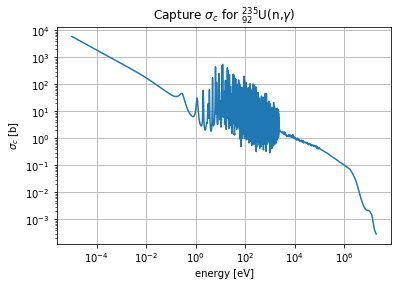

In [20]:
import matplotlib.pyplot as plt 
import pandas as pd
df = pd.read_csv('data/u-235-sigma-c.dat', 
                  names=['energy [eV]','sigma_c [b]'], 
                  skiprows=3)
#print(df)
ax = df.plot(loglog=True, x='energy [eV]', y='sigma_c [b]',legend=False,
             title='Capture $\sigma_c$ for $^{235}_{92}$U(n,$\gamma$)')
ax.set(ylabel='$\sigma_c$ [b]')
ax.grid()
plt.show()

## Input Data<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |                  | 
reactivity feedback coef.   | $\alpha_n$         | $-3\times 10^{-4}$   |  cm$^2$          |


For thermal fission of $^{235}$U the following delay neutron data is typically used (*Dynamics of Nuclear Reactors*, David Hetrick, 1993, ANS textbook).


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |